In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [93]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [94]:
df=pd.read_csv('/kaggle/input/lireg/Advertising.csv')

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.10,37.80,69.20,22.10
1,2,44.50,39.30,45.10,10.40
2,3,17.20,45.90,69.30,9.30
3,4,151.50,41.30,58.50,18.50
4,5,180.80,10.80,58.40,12.90


In [95]:
df = df.drop("Unnamed: 0", axis=1)
df.head() #deleting ID column

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

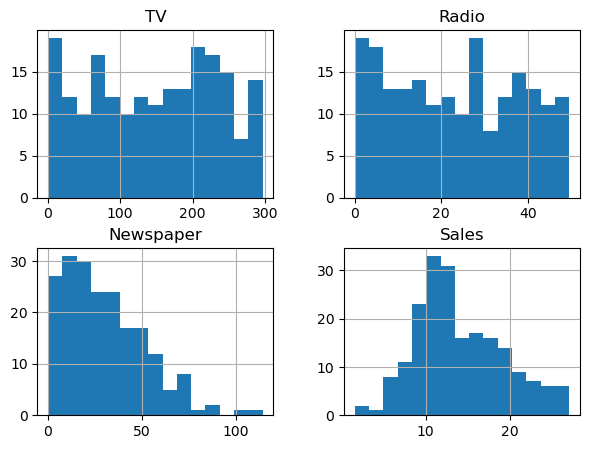

In [96]:
df.hist(bins = 15, figsize = (7, 5))


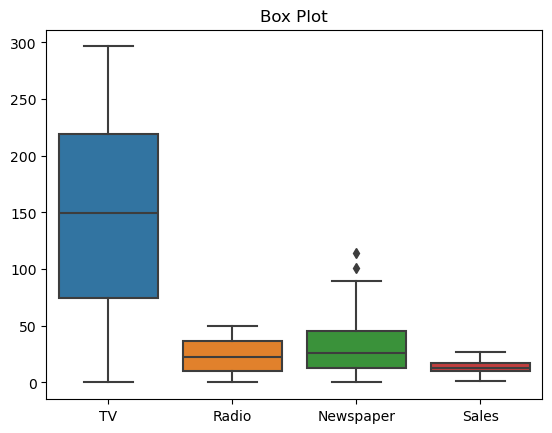

In [97]:
sns.boxplot(data=df)
plt.title('Box Plot')
plt.show() #detect if there are outliers outliers

In [98]:
from scipy import stats


def detect_outliers_iqr(df, column_name, threshold=1.5):
    # Calculate IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)

    # Identify outliers
    outliers = df[~((df[column_name] >= lower_bound) & (df[column_name] <= upper_bound))]

    return outliers
outliers_iqr = detect_outliers_iqr(df, "Newspaper")  # Replace "column_name" with the actual column


print("Outliers detected using IQR:")
print(outliers_iqr)

Outliers detected using IQR:
        TV  Radio  Newspaper  Sales
16   67.80  36.60     114.00  12.50
101 296.40  36.30     100.90  23.80


In [99]:
df_=df.drop(outliers_iqr.index)


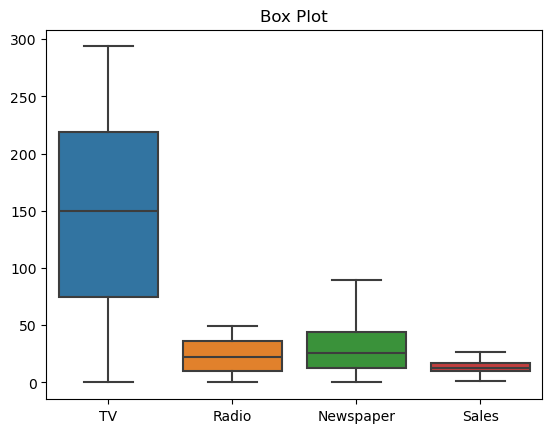

In [100]:
sns.boxplot(data=df_)
plt.title('Box Plot')
plt.show() 

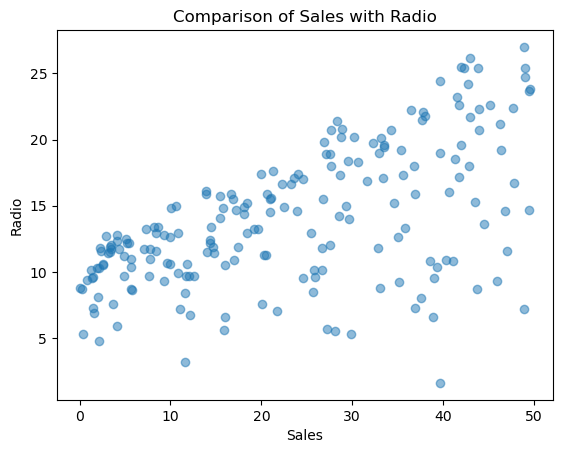

In [101]:
plt.scatter(df_["Radio"],df_["Sales"],alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.title("Comparison of Sales with Radio")
plt.show()


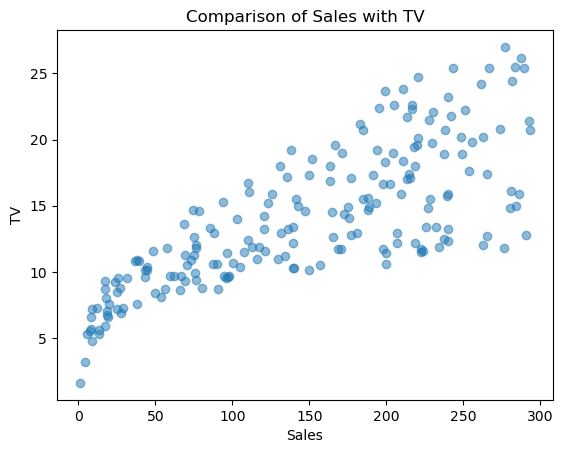

In [102]:
plt.scatter(df_["TV"],df_["Sales"],alpha=0.5)

plt.xlabel("Sales")
plt.ylabel("TV")
plt.title("Comparison of Sales with TV")
plt.show()

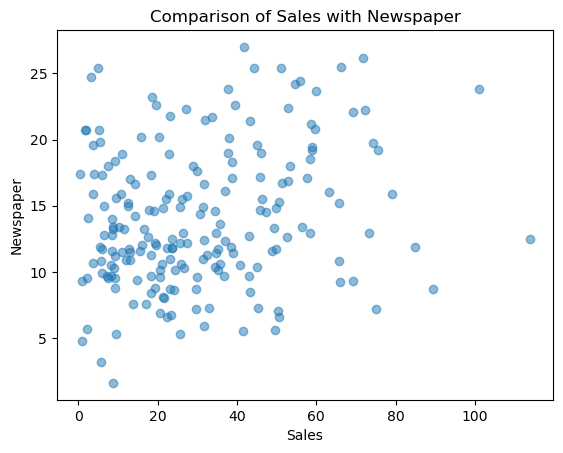

In [103]:
plt.scatter(df["Newspaper"],df["Sales"],alpha=0.5)
plt.xlabel("Sales")
plt.ylabel("Newspaper")
plt.title("Comparison of Sales with Newspaper")
plt.show()


In [104]:
X = df_.drop("Sales", axis=1)
y = df_["Sales"] #train and test 

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [106]:
X_test.shape
y_test.shape

(40,)

In [107]:
X_train.shape
y_train.shape

(158,)

In [108]:
reg = LinearRegression() 
reg.fit(X_train, y_train)

LinearRegression()

In [109]:
reg.intercept_


2.9798978284169024

In [110]:
reg.coef_


array([0.04522886, 0.18239275, 0.00504291])

In [111]:
y_pred = reg.predict(X_train) #RMSE 
np.sqrt(mean_squared_error(y_train, y_pred))

1.6881844417270029

In [112]:
reg.score(X_train, y_train)
#R-squared score  TO train data

0.8935961872087126

In [118]:
reg.score(X_test, y_test)
#R-squared score  TO test data

0.8989454779619589

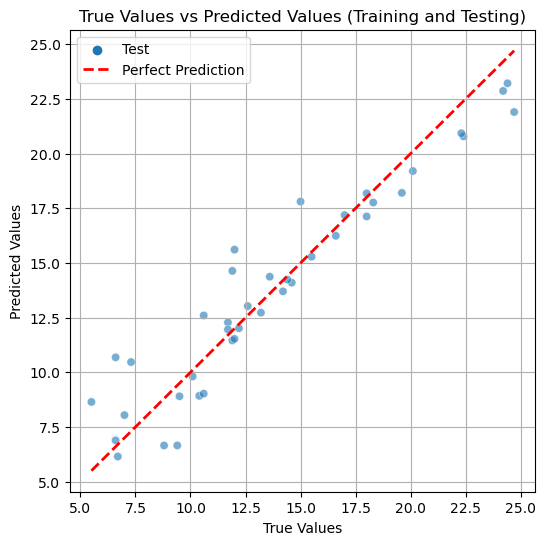

In [119]:
y_test_pred = reg.predict(X_test)
plot_df_test = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_test_pred, 'Dataset': 'Test'})
plot_df = pd.concat([ plot_df_test])

plt.figure(figsize=(6, 6))
sns.scatterplot(x='True Values', y='Predicted Values', hue='Dataset', data=plot_df, alpha=0.6)
plt.plot([plot_df['True Values'].min(), plot_df['True Values'].max()],
         [plot_df['True Values'].min(), plot_df['True Values'].max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values (Training and Testing)')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
#generate a prediction with data from user 
import pandas as pd

value1 = float(input("Enter number of ads for TV: "))
value2 = float(input("Enter number of ads for Radio: "))
value3 = float(input("Enter number of ads for Newspaper: "))

user_input_df = pd.DataFrame([[value1, value2, value3]], columns=["TV", "Radio", "Newspaper"])

predicted_salary = reg.predict(user_input_df)

print(f"Predicted Salary: {predicted_salary[0]}")


Enter number of ads for TV:  8
Enter number of ads for Radio:  4
Enter number of ads for Newspaper:  2


Predicted Salary: 4.081385477999003
